In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob

In [3]:
masterdir = '/Users/law232/Desktop/Observations 2016-17/2016-10-18/'
glob.glob(masterdir+'*')

['/Users/law232/Desktop/Observations 2016-17/2016-10-18/2016-10-18.log',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-18/working',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-18/tjw_log.txt',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-18/xxCyg_ComparisonStars.txt']

In [4]:
datafilenames = glob.glob(masterdir+'XXCygni/*.fits')
datafilenames = sorted(datafilenames) # Not necessary, but puts the filenames␣in a logical order.
print("There are {0} image files in the target data directory".format(len(datafilenames)))
datafilenames[0:10] # List the first 10 filenames.

There are 379 image files in the target data directory


['/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0042.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0043.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0044.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0045.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0046.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0047.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0048.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0049.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0050.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0051.fits']

In [5]:
len(datafilenames)

379

In [6]:
datafilenames.remove(masterdir+'XXCygni/CCD_Image_0114.fits') # No stars
datafilenames.remove(masterdir+'XXCygni/CCD_Image_0115.fits') # No stars
datafilenames.remove(masterdir+'XXCygni/CCD_Image_0116.fits') # No stars
datafilenames.remove(masterdir+'XXCygni/CCD_Image_0117.fits') # No stars
datafilenames.remove(masterdir+'XXCygni/CCD_Image_0125.fits') # Recentering
datafilenames.remove(masterdir+'XXCygni/CCD_Image_0126.fits') # Recentering
datafilenames.remove(masterdir+'XXCygni/CCD_Image_0127.fits') # Recentering
datafilenames.remove(masterdir+'XXCygni/CCD_Image_0128.fits') # Recentering
datafilenames.remove(masterdir+'XXCygni/CCD_Image_0185.fits') # Noise
datafilenames.remove(masterdir+'XXCygni/CCD_Image_0186.fits') # Noise
datafilenames.remove(masterdir+'XXCygni/CCD_Image_0187.fits') # Noise
datafilenames.remove(masterdir+'XXCygni/CCD_Image_0271.fits') # Recentering
datafilenames.remove(masterdir+'XXCygni/CCD_Image_0331.fits') # Heavy Cloud

print("There are {0} image files in my list of 'good' images.".format(len(datafilenames)))

There are 366 image files in my list of 'good' images.


In [7]:
import astropy.io.fits as fits
image = fits.open(datafilenames[100])
image.info()

Filename: /Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0150.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      47   (1092, 736)   int16 (rescales to uint16)   


In [8]:
image_data = image[0].data
image_head = image[0].header
image.close()
image_head[:]

SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 1092 /fastest changing axis                           
NAXIS2  =                  736 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2016-10-18T20:15:12' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =   30.000000000000000 /Exposure time in seconds                        
EXPOSURE=   30.000000000000000 /Exposure time in seconds                        
XPIXSZ  =   13.600000000000000 /Pixel Width in microns (after binning)          
YPIXSZ  =   13.600000000000000 /Pixel Height in microns (after binning)         
XBINNING=                   

In [9]:
image_head['HISTORY']

 Dark subtraction (Simple Auto-dark)

/var/folders/8h/8ws563js09s7f29z208xy98w07jfzb/T/ipykernel_33810/276315828.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  a=ax.imshow(image_data,cmap='Greys_r',norm=norm,vmin=downlim,vmax=uplim)


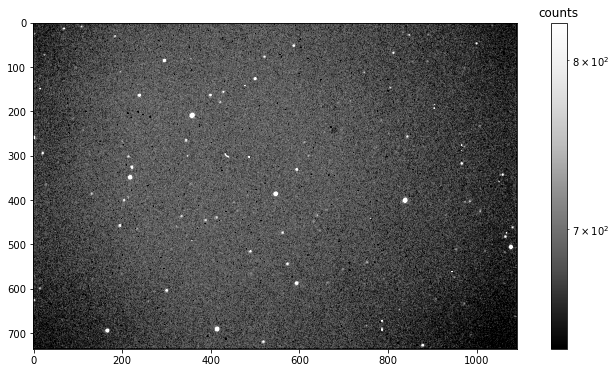

In [10]:
from matplotlib.colors import LogNorm # This enables us to display image brightness on a logarithmic colour scale.
fig=plt.figure(figsize=(12,6))
norm = LogNorm()
uplim=np.percentile(image_data.flatten(),99.9)
downlim=np.percentile(image_data.flatten(),10)
ax = plt.subplot()
a=ax.imshow(image_data,cmap='Greys_r',norm=norm,vmin=downlim,vmax=uplim)
cb=fig.colorbar(a, ax=ax)
cb.ax.set_title('counts')

plt.savefig('CB1_CountsImage.png')

In [11]:
image_data.shape

(736, 1092)

In [12]:
print(image_data) # Show some of the counts values.

[[600 646 606 ... 601 635 541]
 [600 643 651 ... 707 703 611]
 [591 678 685 ... 658 656 567]
 ...
 [590 625 673 ... 638 665 623]
 [571 688 664 ... 625 649 569]
 [607 585 587 ... 555 646 532]]


In [13]:
glob.glob('/Users/law232/Desktop/Observations 2016-17/2016-10-17/Flats/*.fits')

['/Users/law232/Desktop/Observations 2016-17/2016-10-17/Flats/CCD_Image_0114.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-17/Flats/iCCD_Image_0119.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-17/Flats/iCCD_Image_0118.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-17/Flats/iCCD_Image_0122.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-17/Flats/CCD_Image_0115.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-17/Flats/CCD_Image_0112.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-17/Flats/CCD_Image_0128.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-17/Flats/CCD_Image_0108.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-17/Flats/CCD_Image_0124.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-17/Flats/CCD_Image_0125.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-17/Flats/CCD_Image_0109.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-17/Flats/CCD_Image_0

In [14]:
flat_files=[]
for x in glob.glob('/Users/law232/Desktop/Observations 2016-17/2016-10-17/Flats/*.fits'):
    if x.split('/')[-1].startswith('i'):
        flat_files.append(x)
flat_files = sorted(flat_files) # Not necessary, but puts the filenames in a logical order.
print('There are {0} Sloan-i-band flatfield images.'.format(len(flat_files)))

There are 5 Sloan-i-band flatfield images.


In [15]:
flat_files

['/Users/law232/Desktop/Observations 2016-17/2016-10-17/Flats/iCCD_Image_0118.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-17/Flats/iCCD_Image_0119.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-17/Flats/iCCD_Image_0120.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-17/Flats/iCCD_Image_0121.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-17/Flats/iCCD_Image_0122.fits']

In [16]:
flat_images=[]
flat_headers=[]
for x in flat_files:
    image = fits.open(x)
    flat_images.append(image[0].data)
    flat_headers.append(image[0].header)
    image.close()
flat_headers[0]['HISTORY']

 Bias Subtraction (Bias 1, 1092 x 736, Bin2 x 2, Exp Time 0ms)
 Dark Subtraction (Dark 18, 1092 x 736, Bin2 x 2, Exp Time 5s)

In [17]:
print('The minimum counts value among all pixels in the whole image is {0}, and the maximum is {1}'.format(np.nanmin(flat_images[0]), np.nanmax(flat_images[0])))
print('The mean, median, and standard deviation are {0}, {1}, and {2}'.format(np.nanmean(flat_images[0]), np.nanmedian(flat_images[0]), np.nanstd(flat_images[0])))

The minimum counts value among all pixels in the whole image is 0, and the maximum is 18623
The mean, median, and standard deviation are 5514.52514582338, 5529.0, and 123.01167445988912


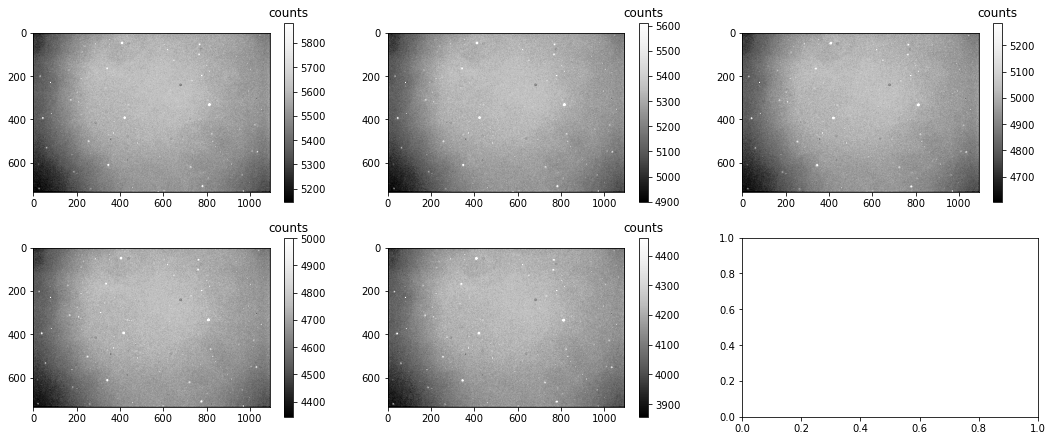

In [18]:
nstd = 3. # This variable is just to specify the range in the image colour scale.
fig, axes = plt.subplots(2, 3, figsize=(6*3,3.625*2))
for i,j in enumerate([(0,0),(0,1),(0,2),(1,0),(1,1)]):
    ax = axes[j]
    vmin = np.nanmean(flat_images[i])-nstd*np.nanstd(flat_images[i])
    vmax = np.nanmean(flat_images[i])+nstd*np.nanstd(flat_images[i])
    a = ax.imshow(flat_images[i], cmap='Greys_r', vmin=vmin, vmax=vmax)
    cb = fig.colorbar(a, ax=ax)
    cb.ax.set_title('counts')
    
plt.savefig('CB1_ImageColourScale.png')

In [19]:
normalised_flats = flat_images[:]
for i,x in enumerate(flat_images):
    normalised_flats[i] = x/(np.nanmedian(x))
    print(np.nanmedian(normalised_flats[i]))

1.0
1.0
1.0
1.0
1.0


In [20]:
all_norm_flats = np.array(normalised_flats)
all_norm_flats.shape

(5, 736, 1092)

In [21]:
comb_norm_flat = np.median(all_norm_flats, axis=0)
comb_norm_flat.shape

(736, 1092)

In [22]:
np.nanmedian(comb_norm_flat)

1.001067463706234

In [23]:
comb_norm_flat = comb_norm_flat / np.nanmedian(comb_norm_flat)
np.nanmedian(comb_norm_flat)

1.0

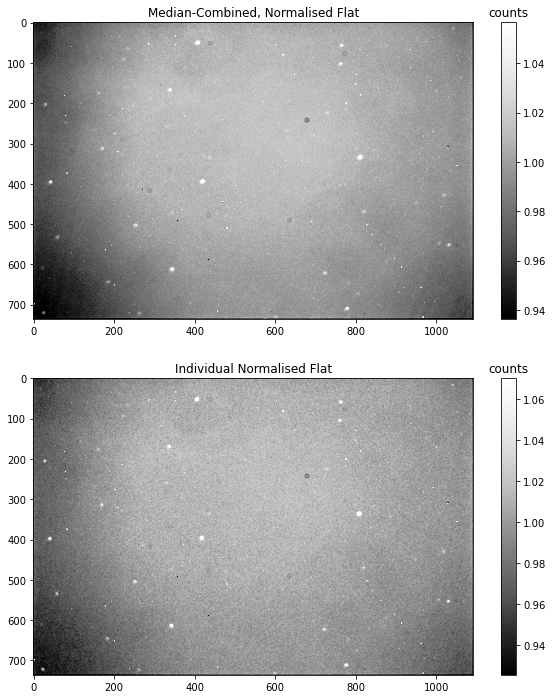

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(10,12))

ax = axes[0]
nstd = 3.
vmin = np.nanmean(comb_norm_flat)-nstd*np.nanstd(comb_norm_flat)
vmax = np.nanmean(comb_norm_flat)+nstd*np.nanstd(comb_norm_flat)
a = ax.imshow(comb_norm_flat, cmap='Greys_r', vmin=vmin, vmax=vmax)
cb = fig.colorbar(a, ax=ax)
cb.ax.set_title('counts')
ax.set_title('Median-Combined, Normalised Flat')

ax = axes[1]
nstd = 3.
nimg = 4
vmin = np.nanmean(normalised_flats[nimg])-nstd*np.nanstd(normalised_flats[nimg])
vmax = np.nanmean(normalised_flats[nimg])+nstd*np.nanstd(normalised_flats[nimg])
a = ax.imshow(normalised_flats[nimg], cmap='Greys_r', vmin=vmin, vmax=vmax)
cb = fig.colorbar(a, ax=ax)
cb.ax.set_title('counts')
ax.set_title('Individual Normalised Flat')

plt.savefig('CB1_NormalizedFlat.png')

In [25]:
hdu = fits.PrimaryHDU(data=comb_norm_flat)
hdu.header # The above creates a rudimentary header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1092                                                  
NAXIS2  =                  736                                                  
EXTEND  =                    T                                                  

In [26]:
new_file_name = 'flat_Sloani_median_combined.fits' # Give your filenames useful information.
outfile = masterdir+'working/'+new_file_name
print(outfile)

/Users/law232/Desktop/Observations 2016-17/2016-10-18/working/flat_Sloani_median_combined.fits


In [27]:
hdu = fits.PrimaryHDU(comb_norm_flat)
hdu.writeto(outfile, overwrite=True)

In [28]:
nan_ = np.where(comb_norm_flat == 0)
nx,ny = nan_[0][0],nan_[1][0]
comb_norm_flat[nx,ny] = (1/8) * (np.sum(comb_norm_flat[nx-1:nx+2,ny-1:ny+2]))
calibrated_image = image_data / comb_norm_flat

Text(0.5, 1.0, 'Flatfielded Image')

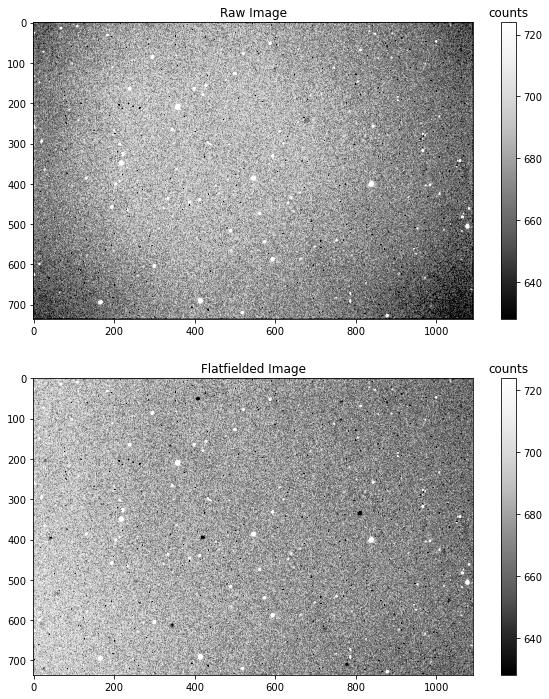

In [70]:
fig, axes = plt.subplots(2, 1, figsize=(10,12))
ax = axes[0]
nstd = 1.
vmin = np.nanmedian(image_data)-nstd*np.nanstd(image_data)
vmax = np.nanmedian(image_data)+nstd*np.nanstd(image_data)
a = ax.imshow(image_data, cmap='Greys_r', vmin=vmin, vmax=vmax)
cb = fig.colorbar(a, ax=ax)
cb.ax.set_title('counts')
ax.set_title('Raw Image')

ax = axes[1]
nstd = 1.
#vmin = np.nanmedian(calibrated_image)-nstd*np.nanstd(calibrated_image)
#vmax = np.nanmedian(calibrated_image)+nstd*np.nanstd(calibrated_image)
a = ax.imshow(calibrated_image, cmap='Greys_r', vmin=vmin, vmax=vmax)
cb = fig.colorbar(a, ax=ax)
cb.ax.set_title('counts')
ax.set_title('Flatfielded Image')

plt.savefig('XXCygni_R.png')

In [72]:
for image_name in datafilenames[:]:
    print(image_name)
    image = fits.open(image_name)
    image_data = image[0].data
    image_head = image[0].header
    image.close()
    calibrated_image = image_data / comb_norm_flat
    hdu = fits.PrimaryHDU(data=calibrated_image,header=image_head)
    outfile = masterdir+'working/cal_'+image_name.split('/')[-1]
    hdu.writeto(outfile, overwrite=True)

/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0042.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0043.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0044.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0045.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0046.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0047.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0048.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0049.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0050.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0051.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0052.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0053.fits
/Users/law232/De

/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0151.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0152.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0153.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0154.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0155.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0156.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0157.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0158.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0159.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0160.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0161.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0162.fits
/Users/law232/De

/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0257.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0258.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0259.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0260.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0261.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0262.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0263.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0264.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0265.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0266.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0267.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0268.fits
/Users/law232/De

/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0361.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0362.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0363.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0364.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0365.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0366.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0367.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0368.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0369.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0370.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0371.fits
/Users/law232/Desktop/Observations 2016-17/2016-10-18/XXCygni/CCD_Image_0372.fits
/Users/law232/De